In [1]:
text = "This warning shouldn't be taken lightly."

In [2]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
print([token.text for token in doc])

['This', 'warning', 'should', "n't", 'be', 'taken', 'lightly', '.']


In [3]:
print([(token.text, token.is_stop) for token in doc])

[('This', True), ('warning', False), ('should', True), ("n't", True), ('be', True), ('taken', False), ('lightly', False), ('.', False)]


In [4]:
texts = [
    "blue car and blue window",
    "black crow in the window",
    "i see my reflection in the window"
]

In [5]:
vocab = sorted(set(word for sentence in texts for word in sentence.split()))
print(len(vocab), vocab)

12 ['and', 'black', 'blue', 'car', 'crow', 'i', 'in', 'my', 'reflection', 'see', 'the', 'window']


In [6]:
import numpy as np

def binary_transform(text):
    output = np.zeros(len(vocab))
    words = set(text.split())
    #如果每个词在词汇表中就把该位置置为1
    for i, v in enumerate(vocab):
        output[i] = v in words
    return output

print(binary_transform("i saw crow"))

[0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(binary=True)
vec.fit(texts)
print([w for w in sorted(vec.vocabulary_.keys())])

['and', 'black', 'blue', 'car', 'crow', 'in', 'my', 'reflection', 'see', 'the', 'window']


In [8]:
import pandas as pd

pd.DataFrame(vec.transform(texts).toarray(), columns=sorted(vec.vocabulary_.keys()))

,and,black,blue,car,crow,in,my,reflection,see,the,window
0,1,0,1,1,0,0,0,0,0,0,1
1,0,1,0,0,1,1,0,0,0,1,1
2,0,0,0,0,0,1,1,1,1,1,1


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(binary=False) #默认为False,可以不写
vec.fit(texts)

import pandas as pd
pd.DataFrame(vec.transform(texts).toarray(), columns=sorted(vec.vocabulary_.keys()))

,and,black,blue,car,crow,in,my,reflection,see,the,window
0,1,0,2,1,0,0,0,0,0,0,1
1,0,1,0,0,1,1,0,0,0,1,1
2,0,0,0,0,0,1,1,1,1,1,1


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
vec.fit(texts)

import pandas as pd
pd.DataFrame(vec.transform(texts).toarray(), columns=sorted(vec.vocabulary_.keys()))

,and,black,blue,car,crow,in,my,reflection,see,the,window
0,0.396875,0.000000,0.793749,0.396875,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.234400
1,0.000000,0.534093,0.000000,0.000000,0.534093,0.406192,0.00000,0.00000,0.00000,0.406192,0.315444
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.358291,0.47111,0.47111,0.47111,0.358291,0.278245


In [ ]:
!pip install jange

In [ ]:

ds

DataStream(item_type=<class 'str'>, is_finite=True, total_items=2225)

In [ ]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/jangedoo/jange/master/dataset/bbc.csv")
data.sample(10)

,Unnamed: 0,news,type
2114,2114,Games win for Blu-ray DVD format\n \n The next...,tech
163,163,"Go-ahead for Balkan oil pipeline\n \n Albania,...",business
8,8,WorldCom director admits lying\n \n The former...,business
458,458,Christmas sales worst since 1981\n \n UK retai...,business
1479,1479,Wilkinson fit to face Edinburgh\n \n England c...,sport
927,927,CSA chief who 'quit' still in job\n \n The hea...,politics
1040,1040,Howard unveils election platform\n \n The Cons...,politics
416,416,AstraZeneca hit by drug failure\n \n Shares in...,business
1419,1419,Wales critical of clumsy Grewcock\n \n Wales c...,sport
1726,1726,"France v Wales (Sat)\n \n Stade de France, Par...",sport


In [ ]:
from jange import ops, stream, vis

ds = stream.from_csv(
    "https://raw.githubusercontent.com/jangedoo/jange/master/dataset/bbc.csv",
    columns='news',
    context_column="type"
)

# Extract clusters
result_collector = {}
clusters_ds = ds.apply(
    ops.text.clean.pos_filter("NOUN", keep_matching_tokens=True),
    ops.text.encode.tfidf(max_features=5000, name="tfidf"),
    ops.cluster.minibatch_kmeans(n_clusters=5),
    result_collector=result_collector,
)
# Get features extracted by tfidf and reduce the dimensions
features_ds = result_collector[clusters_ds.applied_ops.find_by_name("tfidf")] 

StopIteration: ignored

In [ ]:
features_ds

In [ ]:
reduced_features = features_ds.apply(ops.dim.pca(n_dim=2)) #用pca降到2维

# Visualization
vis.cluster.visualize(reduced_features, clusters_ds)

In [1]:
!wget http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip

--2021-04-23 06:11:47--  http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip
Resolving mlg.ucd.ie (mlg.ucd.ie)... 137.43.93.132
Connecting to mlg.ucd.ie (mlg.ucd.ie)|137.43.93.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874078 (2.7M) [application/zip]
Saving to: ‘bbc-fulltext.zip’

bbc-fulltext.zip    100%[===================>]   2.74M  4.51MB/s    in 0.6s    

2021-04-23 06:11:48 (4.51 MB/s) - ‘bbc-fulltext.zip’ saved [2874078/2874078]



In [2]:
!unzip /content/bbc-fulltext.zip  

Archive:  /content/bbc-fulltext.zip
   creating: bbc/
   creating: bbc/business/
  inflating: bbc/business/001.txt    
  inflating: bbc/business/002.txt    
  inflating: bbc/business/003.txt    
  inflating: bbc/business/004.txt    
  inflating: bbc/business/005.txt    
  inflating: bbc/business/006.txt    
  inflating: bbc/business/007.txt    
  inflating: bbc/business/008.txt    
  inflating: bbc/business/009.txt    
  inflating: bbc/business/010.txt    
  inflating: bbc/business/011.txt    
  inflating: bbc/business/012.txt    
  inflating: bbc/business/013.txt    
  inflating: bbc/business/014.txt    
  inflating: bbc/business/015.txt    
  inflating: bbc/business/016.txt    
  inflating: bbc/business/017.txt    
  inflating: bbc/business/018.txt    
  inflating: bbc/business/019.txt    
  inflating: bbc/business/020.txt    
  inflating: bbc/business/021.txt    
  inflating: bbc/business/022.txt    
  inflating: bbc/business/023.txt    
  inflating: bbc/business/024.txt    
  infla

In [3]:
data_dir = r"/content/bbc"

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import load_files

random_state = 0
data = load_files(data_dir, encoding='utf-8', decode_error='replace', random_state=random_state)
df = pd.DataFrame(list(zip(data['data'], data['target'])), columns=['text', 'label'])
df.sample(10)

,text,label
1218,Blog reading explodes in America\n\nAmericans ...,4
1533,Japanese growth grinds to a halt\n\nGrowth in ...,0
2154,IAAF launches fight against drugs\n\nThe IAAF ...,3
1602,Blair blasts Tory spending plans\n\nTony Blair...,2
1922,US woman sues over ink cartridges\n\nA US woma...,4
1874,Boogeyman takes box office lead\n\nThe low-bud...,1
553,Real will finish abandoned match\n\nReal Madri...,3
1307,S Korean credit card firm rescued\n\nSouth Kor...,0
1330,Ask Jeeves joins web log market\n\nAsk Jeeves ...,4
384,Disney settles disclosure charges\n\nWalt Disn...,0


In [6]:
#特征提取
vec = TfidfVectorizer(stop_words='english')
vec.fit(df.text.values)
features = vec.transform(df.text.values)

In [7]:
features

<2225x29126 sparse matrix of type '<class 'numpy.float64'>'
	with 322146 stored elements in Compressed Sparse Row format>

In [8]:
cls = MiniBatchKMeans(n_clusters=5, random_state=random_state)
cls.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

In [9]:
cls.predict(features)
cls.labels_

array([3, 3, 3, ..., 0, 2, 4], dtype=int32)

In [10]:
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray()) #将特征降到2为

In [11]:
reduced_cluster_centers = pca.transform(cls.cluster_centers_) #将聚类中心降到2D

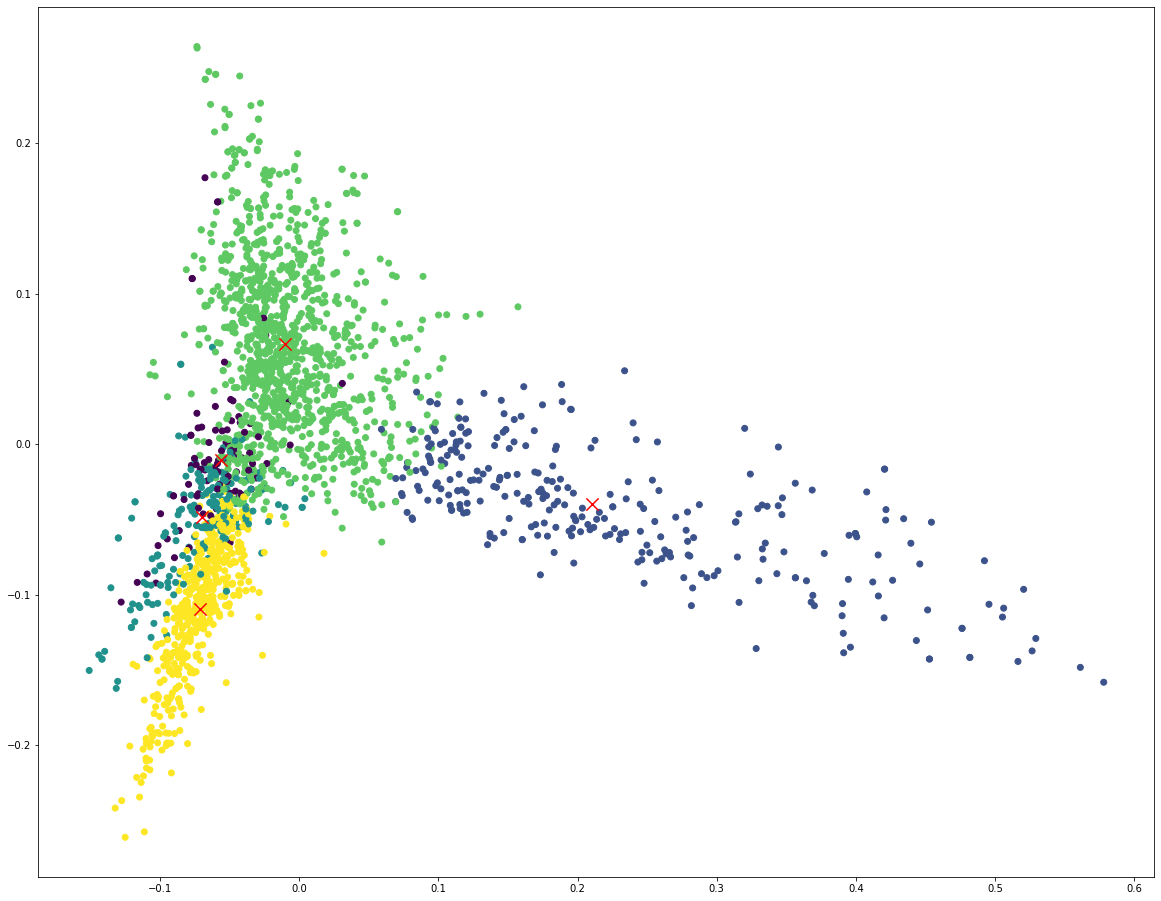

In [12]:
plt.figure(figsize=(20, 16))
plt.scatter(reduced_features[:,0], reduced_features[:, 1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:,0], reduced_cluster_centers[:,1], marker='x', s=150, c='r')
plt.show()

In [13]:
#@title 默认标题文本
from sklearn.metrics import homogeneity_score

homogeneity_score(df.label, cls.predict(features))

0.5433462110559382

In [14]:
from sklearn.metrics import silhouette_score #标签在-1,1
silhouette_score(features, labels=cls.predict(features))

0.009927737289334684

In [15]:
from sklearn.datasets import load_files
import pandas as pd
import spacy

In [30]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])#语言模型 禁止参数
random_state = 0
data_dir = r"/content/bbc"
data = load_files(data_dir, encoding='utf-8', decode_error='replace', random_state=random_state)
df = pd.DataFrame(list(zip(data['data'], data['target'])), columns=['text', 'label'])


In [31]:
df['text']

0       Tate & Lyle boss bags top award\n\nTate & Lyle...
1       Halo 2 sells five million copies\n\nMicrosoft ...
2       MSPs hear renewed climate warning\n\nClimate c...
3       Pavey focuses on indoor success\n\nJo Pavey wi...
4       Tories reject rethink on axed MP\n\nSacked MP ...
                              ...                        
2220    EU fraud clampdown urged\n\nEU member states a...
2221    Tindall aiming to earn Lions spot\n\nBath and ...
2222    Jamelia's return to the top\n\nR&B star Jameli...
2223    Oscars steer clear of controversy\n\nThe Oscar...
2224    Charvis set to lose fitness bid\n\nFlanker Col...
Name: text, Length: 2225, dtype: object

In [35]:
def only_nouns(texts):
    output = []
    for doc in nlp.pipe(texts):
        noun_text = ' '.join(token.lemma_ for token in doc if token.pos_ == 'NOUN') #因为名词对于模型影响最大就只用NOUN
        output.append(noun_text)
    return output
df['text'] = only_nouns(df['text'])

In [36]:
df.head()

,text,label
0,boss bag award executive business magazine tit...,0
1,copy bumper sale fi shooter game copy sale com...,4
2,msp climate warning climate change control dec...,2
3,pavey success view week race track bronze inju...,3
4,tory rethink association candidate election ag...,2


In [37]:
n_topics = 5

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vec = TfidfVectorizer(max_features=5000, stop_words='english', max_df=0.85, min_df=2)
features = vec.fit_transform(df.text)

from sklearn.decomposition import NMF
cls = NMF(n_components=n_topics, random_state=random_state)
cls.fit(features)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=0, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [39]:
cls.components_.shape

(5, 5000)

In [41]:
#向量里找到唯一次的列表
features = vec.get_feature_names()

#最影响每个主题的单词数
n_top_words = 15

for i, topic_vec in enumerate(cls.components_):
    print(i, end=' ')
    #topic_vec.argsort() 词索引按最小分数和最大分数生成的arry
    #[-1:-n_top_words:-1]切片到最大15个词
    for fid in topic_vec.argsort()[-1:-n_top_words:-1]:
        print(features[fid], end=' ')
    print()


0 growth sale economy year company market share rate price firm profit oil analyst month 
1 film award actor star actress director nomination movie year comedy role festival prize category 
2 game player match team injury club time win season coach goal victory title champion 
3 election party government tax minister leader people campaign chancellor plan issue voter country taxis 
4 phone people music technology service user broadband software computer tv network device video site 


In [43]:
new_articles = [
     "Playstation network was down so many people were angry",
    "Germany scored 7 goals against Brazil in worldcup semi-finals"           
]
cls.transform(vec.transform(new_articles)).argsort(axis=1)[:,-1]

array([4, 2])

In [44]:
from sklearn.datasets import fetch_20newsgroups

bunch = fetch_20newsgroups(remove='headers')
print(type(bunch), bunch.keys())

<class 'sklearn.utils.Bunch'> dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [45]:
bunch.data[0]

' I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n'

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(max_features=10000)
features = vec.fit_transform(bunch.data)
print(features.shape)

(11314, 10000)


In [47]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=10, metric='cosine')
knn.fit(features)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [48]:
knn.kneighbors(features[0:1], return_distance=False)

array([[   0,  958, 8013, 8266,  659, 5553, 3819, 2554, 6055, 7993]])

In [49]:
knn.kneighbors(features[0:1], return_distance=True)

(array([[0.        , 0.35119023, 0.62822688, 0.64738668, 0.66613124,
         0.67267273, 0.68149664, 0.68833514, 0.70024449, 0.70169709]]),
 array([[   0,  958, 8013, 8266,  659, 5553, 3819, 2554, 6055, 7993]]))

In [50]:
input_texts = ["any recommendations for good ftp sites?", "i need to clean my car"]
input_features = vec.transform(input_texts)

D, N = knn.kneighbors(input_features, n_neighbors=2, return_distance=True)

for input_text, distances, neighbors in zip(input_texts, D, N):
    print("Input text = ", input_text[:200], "\n")
    for dist, neighbor_idx in zip(distances, neighbors):
        print("Distance = ", dist, "Neighbor idx = ", neighbor_idx)
        print(bunch.data[neighbor_idx][:200])
        print("-"*200)
    print("="*200)
    print()

Input text =  any recommendations for good ftp sites? 

Distance =  0.5870334253639387 Neighbor idx =  89
I would like to experiment with the INTEL 8051 family.  Does anyone out  
there know of any good FTP sites that might have compiliers, assemblers,  
etc.?

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Distance =  0.6566334116701875 Neighbor idx =  7665
Hi!

I am looking for ftp sites (where there are freewares or sharewares)
for Mac. It will help a lot if there are driver source codes in those 
ftp sites. Any information is appreciated. 

Thanks in 
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Input text =  i need to clean my car 

Distance =  0.6592186982514803 Neighbor idx